In [12]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 3s 10ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 2/5
235/235 [==============================] - 2s 9ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6937 - val_loss: 0.6937
Epoch 4/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 5/5
235/235 [==============================] - 2s 11ms/step - loss: 0.6935 - val_loss: 0.6934


In [23]:
from keras.layers import Input, Dense
from keras.models import Model

# Size of encoded representations
encoding_dim = 20  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))

# Encoding layers
encoded = Dense(512, activation='relu')(input_img)  # New hidden layer
encoded = Dense(256, activation='relu')(encoded)    # Existing hidden layer
encoded = Dense(128, activation='relu')(encoded)    # Existing hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

# Decoding layers
decoded = Dense(128, activation='relu')(encoded)    # Existing hidden layer
decoded = Dense(256, activation='relu')(decoded)    # Existing hidden layer
decoded = Dense(512, activation='relu')(decoded)    # New hidden layer
decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Training the model
history = autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/25
235/235 [==============================] - 13s 45ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 2/25
235/235 [==============================] - 12s 52ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 3/25
235/235 [==============================] - 9s 40ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 4/25
235/235 [==============================] - 11s 47ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 5/25
235/235 [==============================] - 12s 49ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 6/25
235/235 [==============================] - 11s 45ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 7/25
235/235 [==============================] - 11s 46ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 8/25
235/235 [==============================] - 10s 44ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 9/25
235/235 [==============================] - 10s 41ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 10/25
235/235 [==============================] - 12s 49ms/step - loss: 0.6928

313/313 [==============================] - 1s 4ms/step


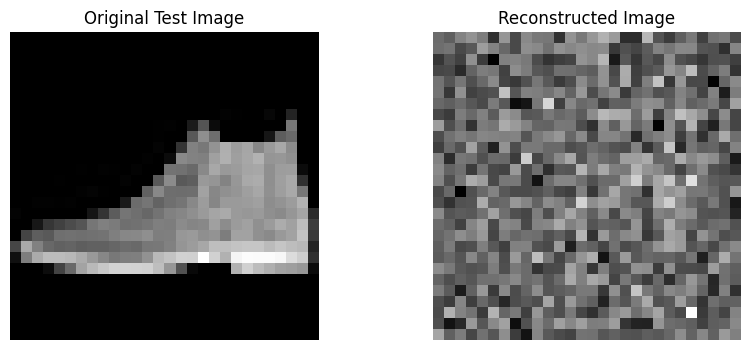

In [24]:
import matplotlib.pyplot as plt

# Perform predictions
reconstructed = autoencoder.predict(x_test)

# Visualize the first test image and its reconstruction
index = 0  # Change this index to visualize different images

# Original Test Image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title("Original Test Image")
plt.axis('off')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed[index].reshape(28, 28), cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()


Epoch 1/25
235/235 [==============================] - 15s 58ms/step - loss: 0.6939 - val_loss: 0.6937
Epoch 2/25
235/235 [==============================] - 14s 58ms/step - loss: 0.6939 - val_loss: 0.6936
Epoch 3/25
235/235 [==============================] - 14s 58ms/step - loss: 0.6938 - val_loss: 0.6935
Epoch 4/25
235/235 [==============================] - 14s 59ms/step - loss: 0.6937 - val_loss: 0.6935
Epoch 5/25
235/235 [==============================] - 14s 58ms/step - loss: 0.6936 - val_loss: 0.6934
Epoch 6/25
235/235 [==============================] - 14s 59ms/step - loss: 0.6935 - val_loss: 0.6933
Epoch 7/25
235/235 [==============================] - 14s 59ms/step - loss: 0.6934 - val_loss: 0.6932
Epoch 8/25
235/235 [==============================] - 13s 57ms/step - loss: 0.6933 - val_loss: 0.6931
Epoch 9/25
235/235 [==============================] - 13s 56ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 10/25
235/235 [==============================] - 13s 57ms/step - loss: 0.693

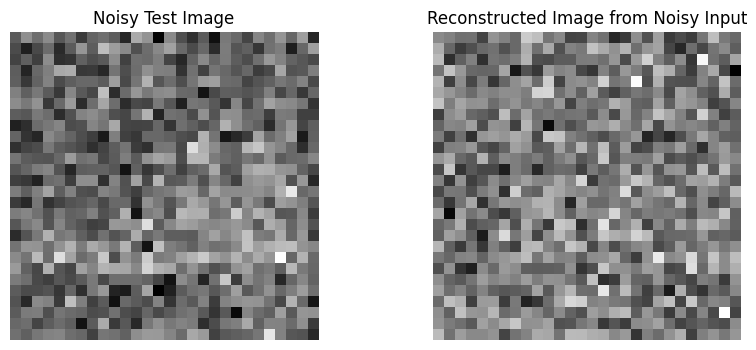

In [25]:
from keras.layers import GaussianNoise

# Define the denoising autoencoder
input_img = Input(shape=(784,))

# Add Gaussian noise layer
noisy_input = GaussianNoise(0.5)(input_img)  # Adding noise to the input

# Encoding layers
encoded = Dense(512, activation='relu')(noisy_input)  # New hidden layer
encoded = Dense(256, activation='relu')(encoded)    # Existing hidden layer
encoded = Dense(128, activation='relu')(encoded)    # Existing hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

# Decoding layers
decoded = Dense(128, activation='relu')(encoded)    # Existing hidden layer
decoded = Dense(256, activation='relu')(decoded)    # Existing hidden layer
decoded = Dense(512, activation='relu')(decoded)    # New hidden layer
decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer

# Denoising autoencoder model
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Add noise to the training data
x_train_noisy = x_train + np.random.normal(0, 0.5, x_train.shape)

# Add noise to the test data
x_test_noisy = x_test + np.random.normal(0, 0.5, x_test.shape)

# Train the denoising autoencoder
history_denoising = denoising_autoencoder.fit(x_train_noisy, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Get the reconstructed images from the denoising autoencoder
reconstructed_noisy = denoising_autoencoder.predict(x_test_noisy)

# Visualize the first noisy test image and its reconstruction
index = 0  # Change this index to visualize different images

# Noisy Test Image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28, 28), cmap='gray')
plt.title("Noisy Test Image")
plt.axis('off')

# Reconstructed Image from Noisy Input
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_noisy[index].reshape(28, 28), cmap='gray')
plt.title("Reconstructed Image from Noisy Input")
plt.axis('off')

plt.show()


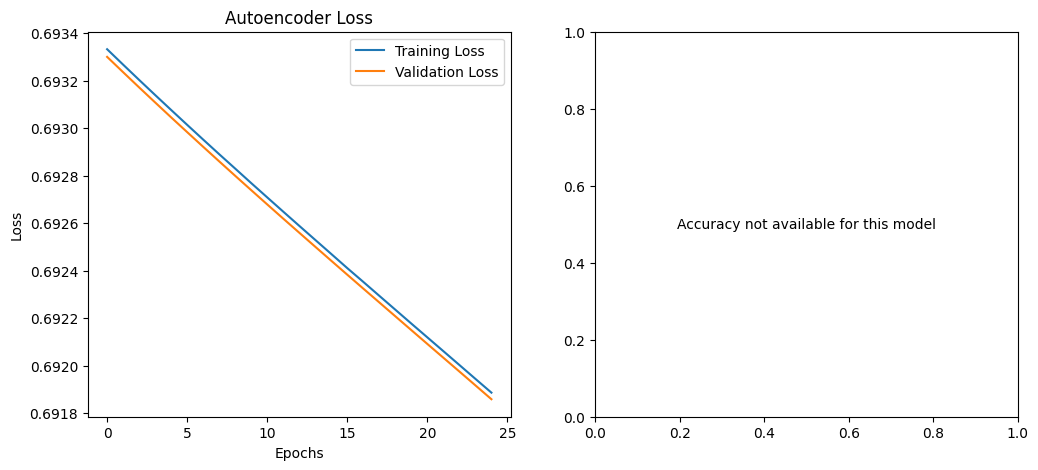

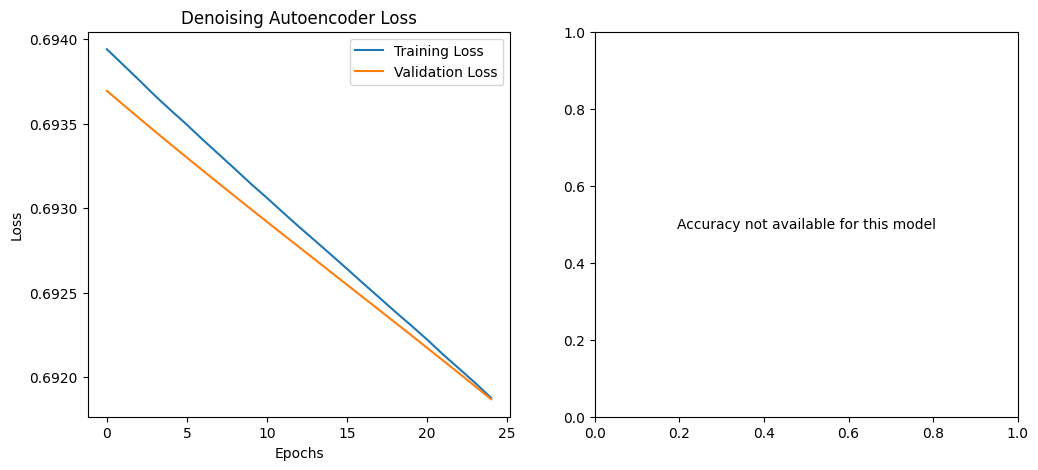

In [26]:
# Plot loss and accuracy for the original autoencoder
plt.figure(figsize=(12, 5))

# Plot loss for the original autoencoder
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy for the original autoencoder
plt.subplot(1, 2, 2)
# Note: The original autoencoder's accuracy is not typically tracked, so this might not be available.
# You can add accuracy metrics in the compile step if needed.
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Autoencoder Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
else:
    plt.text(0.5, 0.5, 'Accuracy not available for this model', ha='center', va='center')

plt.show()

# Plot loss and accuracy for the denoising autoencoder
plt.figure(figsize=(12, 5))

# Plot loss for the denoising autoencoder
plt.subplot(1, 2, 1)
plt.plot(history_denoising.history['loss'], label='Training Loss')
plt.plot(history_denoising.history['val_loss'], label='Validation Loss')
plt.title('Denoising Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy for the denoising autoencoder
plt.subplot(1, 2, 2)
# Note: The denoising autoencoder's accuracy is also not typically tracked, so this might not be available.
# You can add accuracy metrics in the compile step if needed.
if 'accuracy' in history_denoising.history:
    plt.plot(history_denoising.history['accuracy'], label='Training Accuracy')
    plt.plot(history_denoising.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Denoising Autoencoder Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
else:
    plt.text(0.5, 0.5, 'Accuracy not available for this model', ha='center', va='center')

plt.show()
